## AntiMicrobial Peptide (AMP) Activity Classification

Here is the procedure used to train and test the ML model.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import pickle

%matplotlib inline

In [2]:
# Load the pickled model
model = pickle.load(open('predictions/SCV_model_esm1b_v01.pkl', 'rb'))

## Test on BHII and SynCh data

In [3]:
# load more new data
data_test1 = pd.read_csv('embeddings/esm1b_embed_Cumulative_Peptide_data_v02_SynCH_BHII_PG1.csv', index_col=0)
data_test1

,ID,Sequence,MH MIC,%Hemolysis,Strain,Source,1,2,3,4,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,BHII-12.7,RRRCVCGRRICLCGQGRR,0.25,0.370757,25922,BH,0.042060,-0.143884,0.158018,0.173020,...,0.240732,-0.014500,-0.068897,-0.154387,-0.959065,-0.121308,0.093395,-0.011236,0.042702,0.003874
1,BHII-23.3,RCRCVCRRRKCLCQCRRT,0.25,0.318619,25922,BH,-0.010465,0.069580,0.172071,0.160637,...,0.120472,0.055793,-0.093873,-0.235398,-0.695705,0.079114,0.083169,0.024098,0.111141,0.170549
2,PG-1,RGGRLCYCRRRFCVCVGR,0.25,99.324610,25922,BH,0.069356,0.014412,0.153988,0.207273,...,0.231370,-0.092614,-0.111358,-0.203246,-0.624209,-0.010963,0.144078,0.033924,0.115986,0.199400
3,PM-1,RRWCFRVCYRGFCYRKCR,0.25,78.897754,25922,BH,-0.034817,0.068370,0.077565,0.136526,...,0.123844,-0.062760,-0.036685,-0.218499,-0.479205,0.162063,0.050002,0.046202,0.137586,0.081369
4,Protegrin,RGGRLCYCRRRFCVCVGR,0.25,41.838775,W3110,SynCH,0.069356,0.014412,0.153988,0.207273,...,0.231370,-0.092614,-0.111358,-0.203246,-0.624209,-0.010963,0.144078,0.033924,0.115986,0.199400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,SySA-87,CRVRINIDNRSGRVKLEVQC,>256,4.627258,W3110,SynCH,0.015758,0.082417,0.169244,0.101672,...,0.152751,-0.038845,-0.111971,0.070586,-1.161958,-0.088296,0.148634,-0.069219,0.162111,0.138728
218,PG-1.7,RRWCLCFCRRRFCVCVCR,>64,51.181276,W3110,PG lib,0.029662,-0.154676,0.206394,0.098661,...,0.341412,-0.010972,0.004299,-0.064616,-0.842629,-0.014845,0.182091,-0.051647,0.231148,-0.092670
219,PG-1.25,RGWRLCYCRRRFCVCVGH,>64,46.397292,W3110,PG lib,0.083306,-0.019911,0.140256,0.202551,...,0.269570,-0.127981,-0.119833,-0.171615,-0.771128,0.000341,0.136773,0.039540,0.134469,0.134006
220,PG-1.32,HGWRLCYCRRRFCVCVGC,>64,35.460367,W3110,PG lib,0.079516,-0.075833,0.159623,0.188106,...,0.362707,-0.112446,-0.136252,-0.085959,-0.974254,0.034059,0.125580,0.023633,0.129955,0.125466


In [4]:
def convert_mic(mic_value):
    if mic_value.startswith('>'):
        mic_value = float(mic_value.replace('>', ''))
        v = mic_value*2
        return v
    else:
        return float(mic_value)

convert_mic('10')

10.0

In [5]:
data_test1["MH MIC"] = [convert_mic(x) for x in data_test1["MH MIC"]]

In [6]:
# define target to evaluete the model
y_test1 = [1 if x <= 64 else 0 for x in data_test1["MH MIC"]]
print(f'Number of non-AMP: {y_test1.count(0)}\nNumber of AMP: {y_test1.count(1)}') 

Number of non-AMP: 71
Number of AMP: 151


In [7]:
# Define features
features1 = data_test1.iloc[:,6:]
features1

,1,2,3,4,5,6,7,8,9,10,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,0.042060,-0.143884,0.158018,0.173020,-0.134386,0.008875,-0.232052,0.204548,-0.223911,-0.102360,...,0.240732,-0.014500,-0.068897,-0.154387,-0.959065,-0.121308,0.093395,-0.011236,0.042702,0.003874
1,-0.010465,0.069580,0.172071,0.160637,0.018475,0.142919,-0.122061,0.098522,-0.089558,-0.157303,...,0.120472,0.055793,-0.093873,-0.235398,-0.695705,0.079114,0.083169,0.024098,0.111141,0.170549
2,0.069356,0.014412,0.153988,0.207273,-0.114979,0.056145,-0.235482,0.053213,-0.253457,-0.137999,...,0.231370,-0.092614,-0.111358,-0.203246,-0.624209,-0.010963,0.144078,0.033924,0.115986,0.199400
3,-0.034817,0.068370,0.077565,0.136526,-0.039344,0.070022,-0.181993,0.068447,-0.119938,-0.159974,...,0.123844,-0.062760,-0.036685,-0.218499,-0.479205,0.162063,0.050002,0.046202,0.137586,0.081369
4,0.069356,0.014412,0.153988,0.207273,-0.114979,0.056145,-0.235482,0.053213,-0.253457,-0.137999,...,0.231370,-0.092614,-0.111358,-0.203246,-0.624209,-0.010963,0.144078,0.033924,0.115986,0.199400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0.015758,0.082417,0.169244,0.101672,-0.175386,-0.031896,-0.058275,0.021239,-0.191430,-0.050347,...,0.152751,-0.038845,-0.111971,0.070586,-1.161958,-0.088296,0.148634,-0.069219,0.162111,0.138728
218,0.029662,-0.154676,0.206394,0.098661,-0.024752,0.045845,-0.042360,0.275951,-0.114330,-0.107151,...,0.341412,-0.010972,0.004299,-0.064616,-0.842629,-0.014845,0.182091,-0.051647,0.231148,-0.092670
219,0.083306,-0.019911,0.140256,0.202551,-0.115332,0.040038,-0.267226,0.098086,-0.227475,-0.080948,...,0.269570,-0.127981,-0.119833,-0.171615,-0.771128,0.000341,0.136773,0.039540,0.134469,0.134006
220,0.079516,-0.075833,0.159623,0.188106,-0.103340,0.011381,-0.325161,0.209045,-0.258375,-0.058538,...,0.362707,-0.112446,-0.136252,-0.085959,-0.974254,0.034059,0.125580,0.023633,0.129955,0.125466


**Note: Do NOT forget to check the dimension of the features data set, has to be (num_samples,1280).**

In [8]:
## Data scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

X_test1 = pd.DataFrame(scaler.fit_transform(features1))
X_test1

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.576720,0.037344,0.605949,0.781218,0.237792,0.400057,0.360373,0.716087,0.384495,0.474850,...,0.596333,0.625216,0.665834,0.260972,0.448136,0.248157,0.295750,0.419904,0.293985,0.402475
1,0.357096,0.703054,0.648043,0.745570,0.791833,0.795805,0.645406,0.429525,0.710201,0.288857,...,0.261382,0.875536,0.584623,0.022117,0.650213,0.779919,0.254624,0.574135,0.485037,0.780275
2,0.690853,0.531006,0.593879,0.879823,0.308133,0.539618,0.351484,0.307067,0.312868,0.354206,...,0.570258,0.347044,0.527768,0.116915,0.705072,0.540926,0.499598,0.617029,0.498565,0.845670
3,0.255273,0.699281,0.364967,0.676159,0.582270,0.580587,0.490098,0.348241,0.636552,0.279816,...,0.270772,0.453357,0.770576,0.071944,0.816334,1.000000,0.121226,0.670621,0.558861,0.578131
4,0.690853,0.531006,0.593879,0.879823,0.308133,0.539618,0.351484,0.307067,0.312868,0.354206,...,0.570258,0.347044,0.527768,0.116915,0.705072,0.540926,0.499598,0.617029,0.498565,0.845670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0.466744,0.743088,0.639576,0.575823,0.089192,0.279686,0.810701,0.220652,0.463237,0.650923,...,0.351285,0.538520,0.525776,0.924289,0.292456,0.335745,0.517923,0.166813,0.627324,0.708147
218,0.524878,0.003689,0.750852,0.567155,0.635159,0.509208,0.851943,0.909068,0.650148,0.458630,...,0.876751,0.637780,0.903839,0.525655,0.537478,0.530625,0.652485,0.243512,0.820047,0.183642
219,0.749183,0.423969,0.552747,0.866229,0.306853,0.492062,0.269224,0.428347,0.375855,0.547334,...,0.676655,0.221096,0.500211,0.210176,0.592340,0.570918,0.470216,0.641540,0.550161,0.697443
220,0.733335,0.249568,0.610757,0.824646,0.350320,0.407456,0.119091,0.728241,0.300947,0.623195,...,0.936064,0.276418,0.446824,0.462726,0.436481,0.660380,0.425199,0.572108,0.537559,0.678086


In [9]:
# Making predictions
y_pred1 = model.predict(X_test1)

#accuracy_score
metrics.accuracy_score(y_test1, y_pred1)

0.6531531531531531

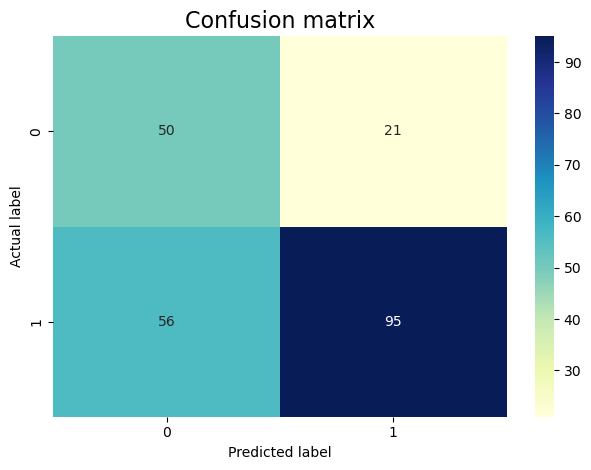

In [10]:
# confusion_matrix, 
conf_m = metrics.confusion_matrix(y_test1, y_pred1)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(conf_m), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', fontsize=16)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [11]:
# Test set Model Evaluation
def model_evaluate(y_test, y_pred):
    # accuracy_score
    acc = metrics.accuracy_score(y_test, y_pred)

    # pre - precision_score
    pre = metrics.precision_score(y_test, y_pred)

    # rec - recall_score he recall assesses the ability of the model to recognize Positive samples. 
    # The more Positive samples identified, the larger the recall.
    rec = metrics.recall_score(y_test, y_pred)

    # f1 score
    f1 = metrics.f1_score(y_test, y_pred)

    # AUC - area under the curve
    auc = metrics.roc_auc_score(y_test, y_pred)

    print(f'Accuracy value for the data tested is: {acc}')
    print(f'Precision for the data tested is: {pre}')
    print(f'Recall for the data tested is: {rec}')
    print(f'F1 score for the data tested is: {f1}')
    print(f'AUC for the data tested is: {auc}')


model_evaluate(y_test1, y_pred1)

Accuracy value for the data tested is: 0.6531531531531531
Precision for the data tested is: 0.8189655172413793
Recall for the data tested is: 0.6291390728476821
F1 score for the data tested is: 0.7116104868913857
AUC for the data tested is: 0.666682212480179


In [12]:
# get probabilities
prob1 =model.predict_proba(X_test1)

data_test1['probability_to_be_AMP'] = [round(x[1]*100) for x in prob1]

cols = ['ID', 'Sequence', 'MH MIC', '%Hemolysis', 'Strain',	'Source' , 'probability_to_be_AMP']

res_test1 = data_test1.loc[:,cols]
res_test1

,ID,Sequence,MH MIC,%Hemolysis,Strain,Source,probability_to_be_AMP
0,BHII-12.7,RRRCVCGRRICLCGQGRR,0.25,0.370757,25922,BH,99
1,BHII-23.3,RCRCVCRRRKCLCQCRRT,0.25,0.318619,25922,BH,81
2,PG-1,RGGRLCYCRRRFCVCVGR,0.25,99.324610,25922,BH,100
3,PM-1,RRWCFRVCYRGFCYRKCR,0.25,78.897754,25922,BH,98
4,Protegrin,RGGRLCYCRRRFCVCVGR,0.25,41.838775,W3110,SynCH,100
...,...,...,...,...,...,...,...
217,SySA-87,CRVRINIDNRSGRVKLEVQC,512.00,4.627258,W3110,SynCH,43
218,PG-1.7,RRWCLCFCRRRFCVCVCR,128.00,51.181276,W3110,PG lib,100
219,PG-1.25,RGWRLCYCRRRFCVCVGH,128.00,46.397292,W3110,PG lib,100
220,PG-1.32,HGWRLCYCRRRFCVCVGC,128.00,35.460367,W3110,PG lib,100


In [13]:
# filter1 = y_pred1 == y_test1
# data_test1[filter1].to_csv('embeddings/esm1b_embed_DBAASP_Synch_BHII_PG1_true_pred.csv')

In [14]:
#res_test1.to_excel('predictions/predictions_on_SynCH_BHII_PG1.xlsx')

## Predictions on AMP from DBAASP

In [15]:
# load new data
data_test2 = pd.read_csv('embeddings/esm1b_embed_DBAASP_ecoli_test_16-24len.csv', index_col=0)
data_test2

,ID,NAME,Sequence,TARGET_SPECIES,TARGET ACTIVITY - ACTIVITY MEASURE VALUE,TARGET ACTIVITY - CONCENTRATION,TARGET ACTIVITY - UNIT,MIC,len,AMP,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280
0,672,"Protegrin 1, PG-1, Neutrophil peptide 1",RGGRLCYCRRRFCVCVGR,Escherichia coli MB4902,MIC,0.015,µg/ml,0.015,18,1,...,0.231370,-0.092614,-0.111358,-0.203246,-0.624209,-0.010963,0.144078,0.033924,0.115986,0.199400
1,11746,Tachyplesin-1 [R17A],KWCFRVCYRGICYRRCA,Escherichia coli ATCC 25922,MIC,0.015,µg/ml,0.015,17,1,...,0.143289,-0.098756,-0.048837,-0.167650,-0.552535,0.126323,0.042392,0.009820,0.172698,0.074350
2,2229,Tachyplesin-1,KWCFRVCYRGICYRRCR,Escherichia coli MB4902,MIC,0.016,µg/ml,0.016,17,1,...,0.104323,-0.077452,-0.059548,-0.193782,-0.431612,0.130220,0.022388,0.035017,0.142725,0.082050
3,2121,Microcin J25,GGAGHVPEYFVGIGTPISFYG,Escherichia coli AB1133,MIC,0.02,µg/ml,0.020,21,1,...,0.176162,-0.106424,-0.126953,0.086264,-1.027320,-0.120686,0.197614,-0.075635,-0.005958,0.161162
4,11761,"Tachyplesin-1 [R9A,R17A]",KWCFRVCYAGICYRRCA,Escherichia coli ATCC 25922,MIC,0.03,µg/ml,0.030,17,1,...,0.163586,-0.102866,-0.031424,-0.150970,-0.615584,0.126825,0.040516,-0.008680,0.194397,0.062271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,366,NaN,GKKYRRFWKFKGKWFWFWG,Escherichia coli ATCC 25922,MIC,1024,µg/ml,1024.000,19,0,...,0.185739,-0.069005,-0.007524,0.018516,-0.971788,0.084670,0.207311,-0.101160,0.124439,-0.067496
1169,16204,Burdock peptide,LRCDYGRFFASKSLYDPLKKRR,Escherichia coli ATCC 25922,MIC,>2000,µg/ml,2000.000,22,0,...,0.137968,-0.013597,-0.016957,0.049691,-1.312688,-0.020164,0.234454,-0.045480,0.139485,-0.007455
1170,17768,Beta-casein (140-157),HLPLPLLQPLMQQVPQPI,Escherichia coli,MIC,>3000,µg/ml,3000.000,18,0,...,-0.015669,0.114946,-0.304246,0.108762,-1.262935,0.008076,0.204219,0.103790,-0.026690,0.284326
1171,17769,Beta-casein (203-225),LLNPTHQIYPVTQPLAPVHNPIS,Escherichia coli,MIC,>3000,µg/ml,3000.000,23,0,...,-0.011213,-0.085622,-0.183985,0.003834,-1.347573,-0.097974,0.121234,0.110400,-0.026462,0.280831


In [16]:
# define target to evaluete the model
y_test2 = list(data_test2["AMP"])
print(f'Number of non-AMP: {y_test2.count(0)}\nNumber of AMP: {y_test2.count(1)}') 


Number of non-AMP: 445
Number of AMP: 728


In [17]:
# defining features
features2 = data_test2.iloc[:,10:]
features2.shape

(1173, 1280)

In [18]:
# Feature scaling
X_test2 = pd.DataFrame(scaler.fit_transform(features2))
X_test2

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.610967,0.395304,0.678894,0.532154,0.461291,0.725224,0.224056,0.343027,0.303684,0.642429,...,0.569622,0.713384,0.580921,0.064771,0.865355,0.397246,0.727781,0.651075,0.536865,0.655799
1,0.419366,0.591562,0.462903,0.393871,0.525235,0.726411,0.248105,0.328087,0.466287,0.608473,...,0.451945,0.708521,0.672317,0.122232,0.884143,0.592953,0.614615,0.615107,0.650932,0.520154
2,0.436720,0.583804,0.525045,0.406023,0.566597,0.713822,0.230025,0.328585,0.476004,0.575396,...,0.399886,0.725386,0.656659,0.080049,0.915841,0.598509,0.592352,0.652705,0.590646,0.528507
3,0.627523,0.541259,0.445012,0.556129,0.412723,0.528555,0.453077,0.144486,0.387647,0.746915,...,0.495864,0.702452,0.558123,0.532103,0.759686,0.240831,0.787362,0.487595,0.291591,0.614321
4,0.459787,0.563117,0.536775,0.423139,0.530469,0.631568,0.338057,0.334685,0.504154,0.617073,...,0.479062,0.705268,0.697771,0.149156,0.867615,0.593668,0.612527,0.587503,0.694577,0.507052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,0.479851,0.418233,0.476614,0.409358,0.433735,0.798203,0.581221,0.226392,0.398984,0.832582,...,0.508659,0.732072,0.732709,0.422743,0.774243,0.533574,0.798153,0.449509,0.553866,0.366290
1169,0.589448,0.391960,0.408249,0.421074,0.479612,0.616903,0.450830,0.354764,0.463193,0.787761,...,0.444836,0.775931,0.718919,0.473066,0.684882,0.384129,0.828361,0.532592,0.584129,0.431419
1170,0.825173,0.525288,0.478609,0.773342,0.893190,0.337859,0.302946,0.233962,0.522296,0.433273,...,0.239576,0.877682,0.298950,0.568419,0.697923,0.424386,0.794713,0.755325,0.249892,0.747921
1171,0.661599,0.595046,0.473125,0.445987,0.595242,0.525851,0.586981,0.246965,0.480366,0.657416,...,0.245528,0.718918,0.474752,0.399043,0.675737,0.273208,0.702358,0.765188,0.250352,0.744129


In [19]:
# Making predictions
y_pred2 = model.predict(X_test2)

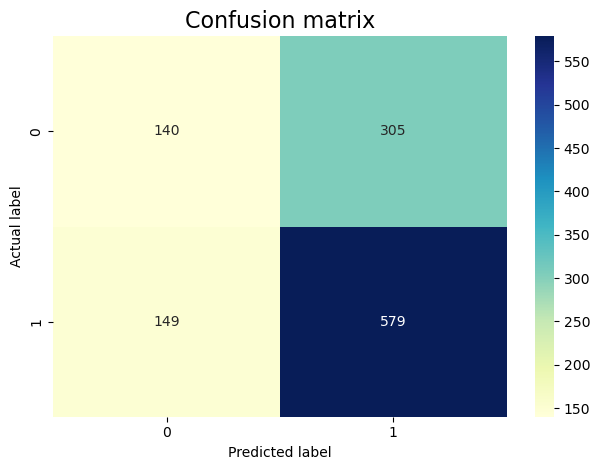

In [20]:
# confusion_matrix, 
conf_m = metrics.confusion_matrix(y_test2, y_pred2)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(conf_m), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', fontsize=16)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [21]:
# model evaluetion
model_evaluate(y_test2, y_pred2)

Accuracy value for the data tested is: 0.6129582267689685
Precision for the data tested is: 0.6549773755656109
Recall for the data tested is: 0.7953296703296703
F1 score for the data tested is: 0.7183622828784119
AUC for the data tested is: 0.5549682059513519


In [22]:
# get probabilities
prob2= model.predict_proba(X_test2)
data_test2['probability_to_be_AMP'] = [round(x[1]*100) for x in prob2]
cols = ['ID', 'NAME', 'Sequence', 'MIC', 'probability_to_be_AMP']
#cols = ['ID', 'Sequence', 'probability_to_be_AMP']

res_test2 = data_test2.loc[:,cols]

res_test2

,ID,NAME,Sequence,MIC,probability_to_be_AMP
0,672,"Protegrin 1, PG-1, Neutrophil peptide 1",RGGRLCYCRRRFCVCVGR,0.015,100
1,11746,Tachyplesin-1 [R17A],KWCFRVCYRGICYRRCA,0.015,100
2,2229,Tachyplesin-1,KWCFRVCYRGICYRRCR,0.016,100
3,2121,Microcin J25,GGAGHVPEYFVGIGTPISFYG,0.020,87
4,11761,"Tachyplesin-1 [R9A,R17A]",KWCFRVCYAGICYRRCA,0.030,99
...,...,...,...,...,...
1168,366,NaN,GKKYRRFWKFKGKWFWFWG,1024.000,92
1169,16204,Burdock peptide,LRCDYGRFFASKSLYDPLKKRR,2000.000,99
1170,17768,Beta-casein (140-157),HLPLPLLQPLMQQVPQPI,3000.000,97
1171,17769,Beta-casein (203-225),LLNPTHQIYPVTQPLAPVHNPIS,3000.000,100


In [23]:
res_test2.query('probability_to_be_AMP > 50')

,ID,NAME,Sequence,MIC,probability_to_be_AMP
0,672,"Protegrin 1, PG-1, Neutrophil peptide 1",RGGRLCYCRRRFCVCVGR,0.015,100
1,11746,Tachyplesin-1 [R17A],KWCFRVCYRGICYRRCA,0.015,100
2,2229,Tachyplesin-1,KWCFRVCYRGICYRRCR,0.016,100
3,2121,Microcin J25,GGAGHVPEYFVGIGTPISFYG,0.020,87
4,11761,"Tachyplesin-1 [R9A,R17A]",KWCFRVCYAGICYRRCA,0.030,99
...,...,...,...,...,...
1168,366,NaN,GKKYRRFWKFKGKWFWFWG,1024.000,92
1169,16204,Burdock peptide,LRCDYGRFFASKSLYDPLKKRR,2000.000,99
1170,17768,Beta-casein (140-157),HLPLPLLQPLMQQVPQPI,3000.000,97
1171,17769,Beta-casein (203-225),LLNPTHQIYPVTQPLAPVHNPIS,3000.000,100


In [24]:
# filter2 = y_pred2 == y_test2
# data_test2[filter2].to_csv('embeddings/esm1b_embed_DBAASP_ecoli_true_pred.csv')